# Life Expectancy and GDP Analysis
#### Data Visualization Project from Codecademy

This project will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

## Import Libraries From Python
Import the primary modules utilized: csv, Pandas, Seaborn, and Matplotlib.

In [1]:
#import csv library to read the .csv dataset
#import pandas for data processing
#import seaborn and matplotlib.pyplot for data visualization
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Data
Loading data via pandas pd.read_csv function. All data is saved to a data frame titled df. A quick inspection of the dataframe was conducted using the .head() function.

In [2]:
#let df represent the dataframe used for this analysis. 
#pandas used to read 'all_data.csv' from my desktop
df = pd.read_csv('/Users/sambshade/Desktop/Life-Expectancy-and-GDP/all_data.csv')

In [3]:
#inspect the first five lines of code
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Exploring the Data
A quick exploration of the data was conducted utilizing .describe(), .info(), .unique() to understand the basic Dtype information, common statistical information (mean, median, standard deviation, etc) and the unique names for both the Country and Year the data was taken. 

In [4]:
#general data for each integer and float values
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [5]:
#find info for the dataframe to ensure no null-counts, and to learn dtypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### Distributive Plots

To better understand the skew of the data, two distributive plots have been detailed below. These two distributive plots have been stacked to reference the total count of each categorical range listed on the x-axis:

* The first plot represents the distribution of GDP for the six identified countries. Per the plot, the distribution of this data is heavily skewed to the right, with the majority of this right skew being represented by the United States of America. Countries like Chile, Mexico, and Zimbabwe, heavily lean towards the left of the data, especially in the range of 0.00 - 0.125 GDP in trillions of dollars. 
* The second plot represents the distribution of Life Expectancy differs per the six identified countries. The distribution of this data drastically differs from the first plot, as the distribution skews heavily to the left. Zimbabwe represents the entirety of the left skew, while the remaining five countries have fairly similar life expectancies with Germany and Chile appearing to have the highest average life expectancies. 

In addition, a boxplot is provided to better understand the skews, median, mean and quartiles of both the GDP and Life Expectancy for each country. 


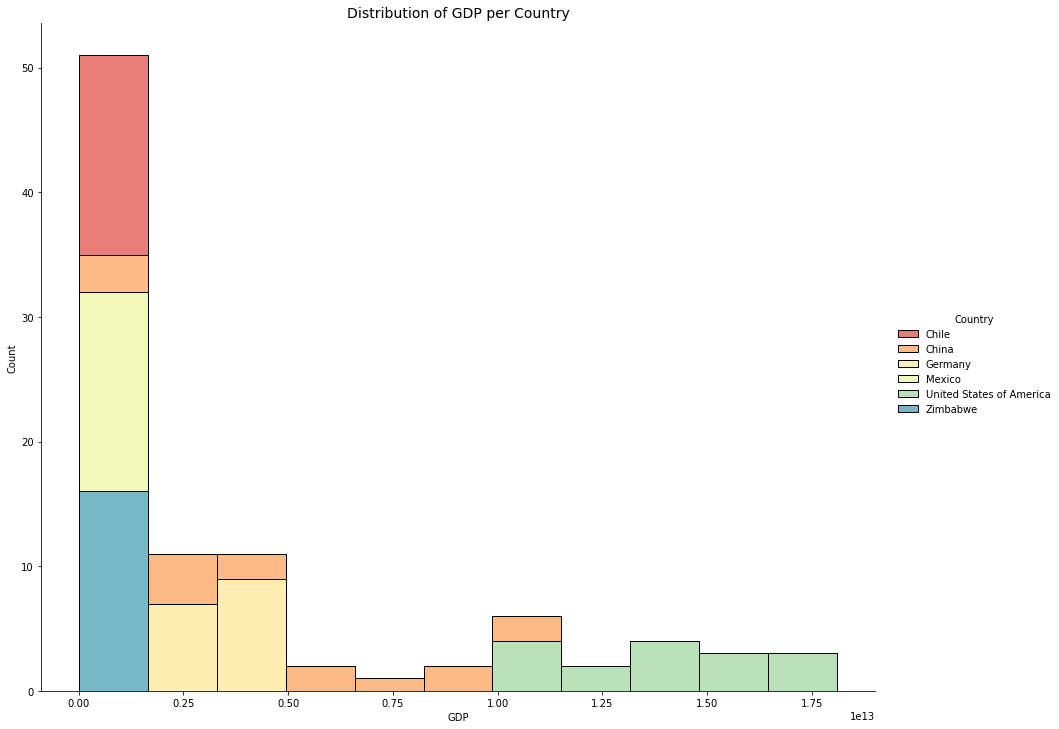

In [7]:
sns.displot(data=df, x='GDP', hue='Country', multiple='stack', aspect = 1.25, height = 10, palette = 'Spectral')
plt.title('Distribution of GDP per Country', fontsize=14)
plt.show()

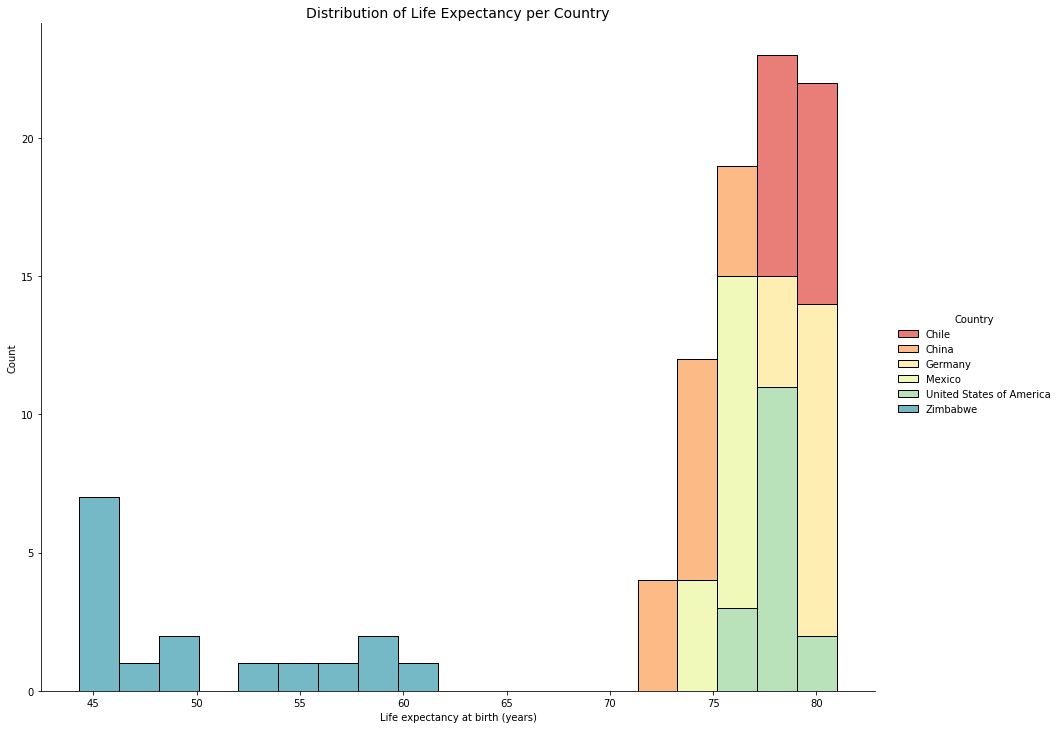

In [8]:
sns.displot(data=df, x='Life expectancy at birth (years)', hue='Country', multiple='stack', aspect = 1.25, height = 10, palette = 'Spectral')
plt.title('Distribution of Life Expectancy per Country', fontsize=14)
plt.show()

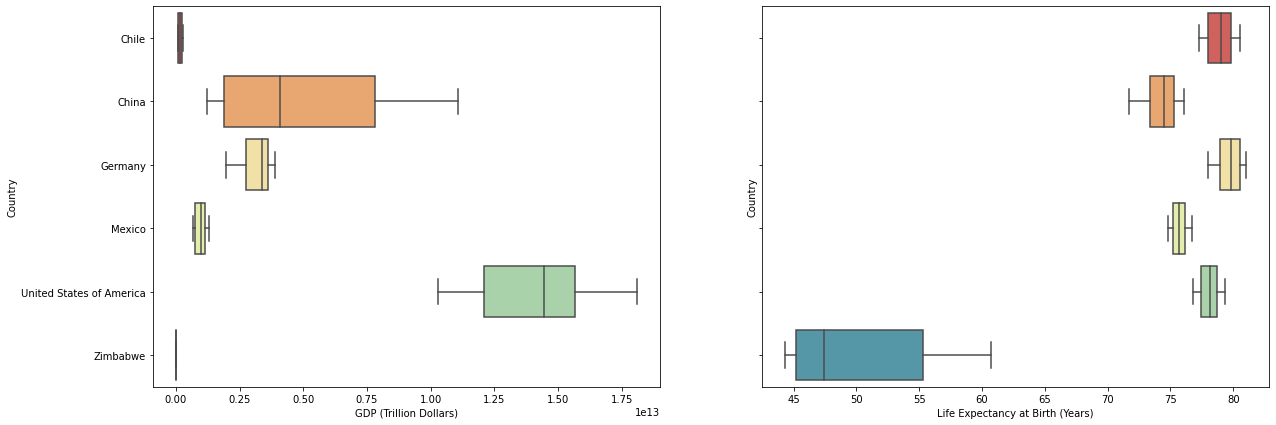

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 7))
ax[0] = sns.boxplot(ax=ax[0],x=df['GDP'], y = df['Country'], palette = 'Spectral')
ax[0].set_xlabel('GDP (Trillion Dollars)')
ax[1] = sns.boxplot(ax=ax[1],x=df['Life expectancy at birth (years)'], y = df['Country'], palette = 'Spectral')
ax[1].set_xlabel('Life Expectancy at Birth (Years)')
plt.show()

### Line Plots


* The first plot is a comparison of all GDP per country. The United States of America represents the country with the best GDP over the span of 2000 - 2015. 
* The second line plot represents how the GDP has changed for the six identified countries from 2000 to 2015. Per the line plot, all six countries have had fairly steady growth of GDP over this timeframe. China and the United States have had the most steady growth over this timeframe. Zimbabwe has seen exponential growth in GDP around 2008 after seeing GDP decrease every year from 2000-2008. Mexico had a steady progression until around 2009 where a drastic decrease in GDP occured. In 2010, the GDP continued to progress normally. 
* The third plot is a comparison of the life expectancy per country. All countries have similar life expectancies, outside of Zimbabwe. 
* The fourth line plot represents how the Life Expectancy has changed for the six identified countries from 2000 to 2015. Per the line plot, all six countries have had fairly steady growth of Life Expectancy over this timeframe. This line plot showed similar characteristics in terms of growth as the first line plot regarding GDP.
* Since the two previous plots were found to have similar characteristics in terms of growth over the years, a third line plot was made to understand how these characteristics related. This line plot shows Life Expectancy vs. GDP, which indicates that these two characteristics are linearly related for all six countries. 


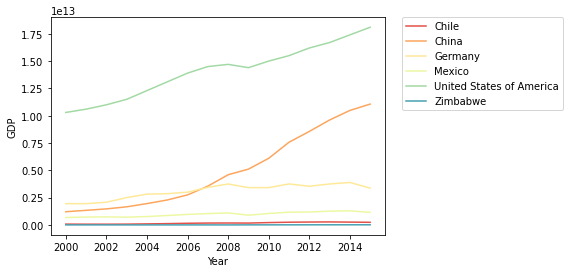

In [10]:
sns.lineplot(x=df['Year'], y=df['GDP'], hue=df.Country, palette = 'Spectral').legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

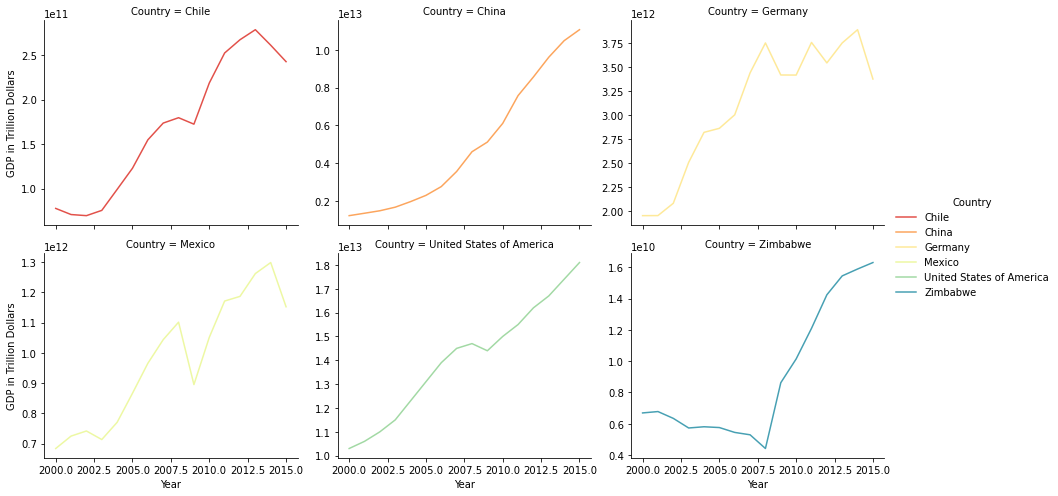

In [11]:
graph_gdp = sns.FacetGrid(df, col="Country", col_wrap = 3, hue="Country", sharey=False, aspect = 1.2, height = 3.5, palette = 'Spectral')
graph_gdp = graph_gdp.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels("Year", "GDP in Trillion Dollars")
plt.show()

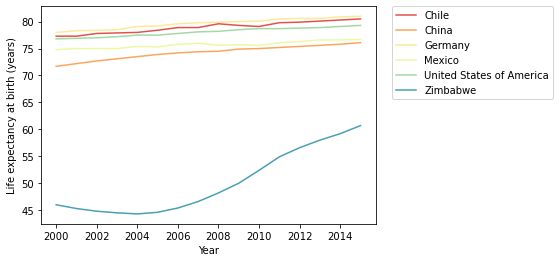

In [12]:
sns.lineplot(x=df['Year'], y=df['Life expectancy at birth (years)'], hue=df.Country, palette = 'Spectral').legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

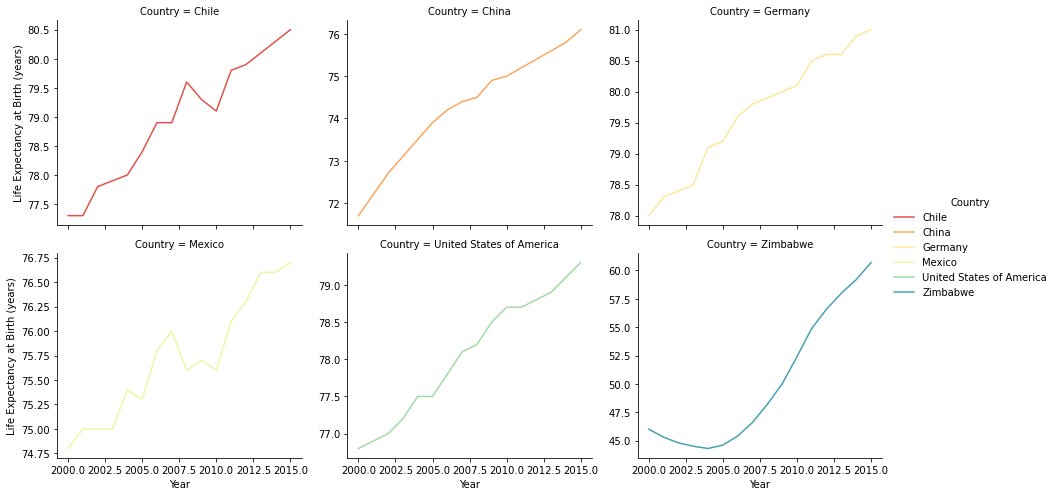

In [13]:
graph_life_exp = sns.FacetGrid(df, col="Country", col_wrap = 3, hue="Country", sharey=False, aspect = 1.2, height = 3.5, palette = 'Spectral')
graph_life_exp = graph_life_exp.map(sns.lineplot, "Year", "Life expectancy at birth (years)").add_legend().set_axis_labels("Year", "Life Expectancy at Birth (years)")
plt.show()

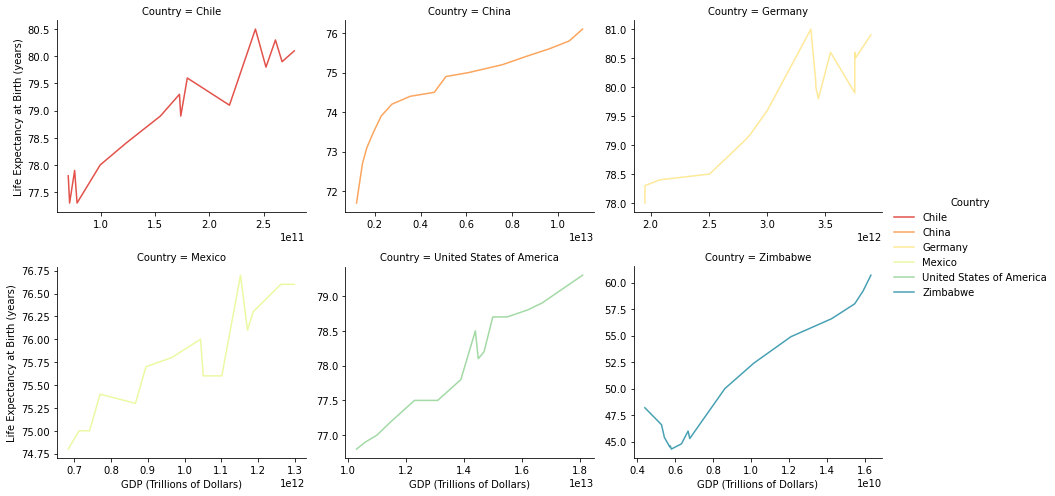

In [14]:
graph_ratio = sns.FacetGrid(df, col="Country", col_wrap = 3, hue="Country", sharey=False, sharex=False, aspect = 1.2, height = 3.5, palette = 'Spectral')
graph_ratio = graph_ratio.map(sns.lineplot, "GDP", "Life expectancy at birth (years)").add_legend().set_axis_labels("GDP (Trillions of Dollars)", "Life Expectancy at Birth (years)")
plt.show()

### Scatter Plots

The previous data has been visualized as scatter plots below to see all of the individual data points. 

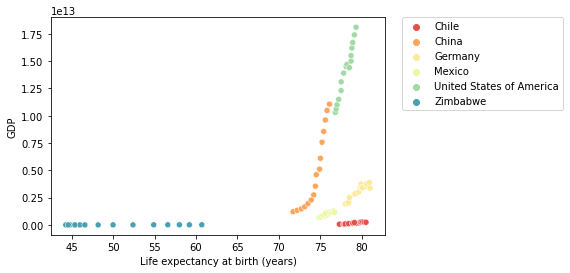

In [15]:
sns.scatterplot(x=df['Life expectancy at birth (years)'], y=df['GDP'], hue=df.Country, palette = 'Spectral').legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

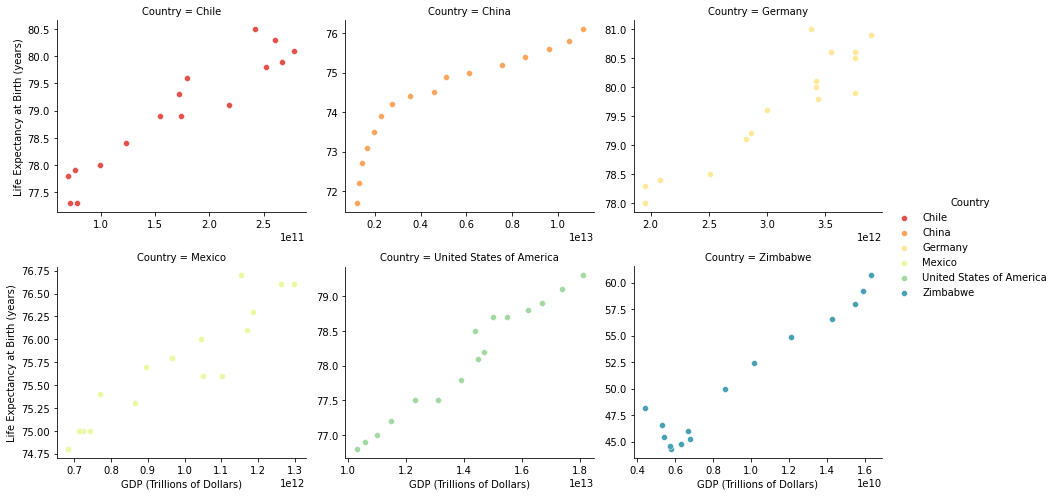

In [16]:
graph_scatter_ratio = sns.FacetGrid(df, col="Country", col_wrap = 3, hue="Country", sharey=False, sharex=False, aspect = 1.2, height = 3.5, palette = 'Spectral')
graph_scatter_ratio = graph_scatter_ratio.map(sns.scatterplot, "GDP", "Life expectancy at birth (years)").add_legend().set_axis_labels("GDP (Trillions of Dollars)", "Life Expectancy at Birth (years)")
plt.show()

## Conclusions: 

The project was also able to answer the following questions:
* How has the GDP trended over time in the six nations?
     * All six countries have had fairly steady growth of GDP over this timeframe. China and the United States have had the most steady growth over this timeframe. Zimbabwe has seen exponential growth in GDP around 2008 after seeing GDP decrease every year from 2000-2008. Mexico had a steady progression until around 2009 where a drastic decrease in GDP occured. In 2010, the GDP continued to progress normally. 
     
* How has life expectancy trended over time in the six nations?
    * All six countries have had fairly steady growth of Life Expectancy over this timeframe. When comparing all six countries on the same lineplot, Zimbabwe has had the greatest growth in life expectancy, with significant growth over the span of 2006-2015. 

* Is there a correlation between GDP and life expectancy of a country?
    * Yes there is a positive correlation between GDP and life expectancy. This is represented by the plots of life expectancy vs. GDP where most trends are positive with a mostly linear relationship. 

* What is the distribution of the GDP and life expectancy?
    * Distribution of the GDP was mostly skewed right with a majority of the data points being represented towards the left portion of the graph. The distribution of life expectancy was the exact opposite with a left skew and data mostly represented on the right side of the graph. 